In [1]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction

In [31]:
# In this example we work with a = 7 and N = 15
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [32]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

## Performing measurement on each step

In [33]:
# Specify variables
n_count = 8  # number of counting qubits
a = 7

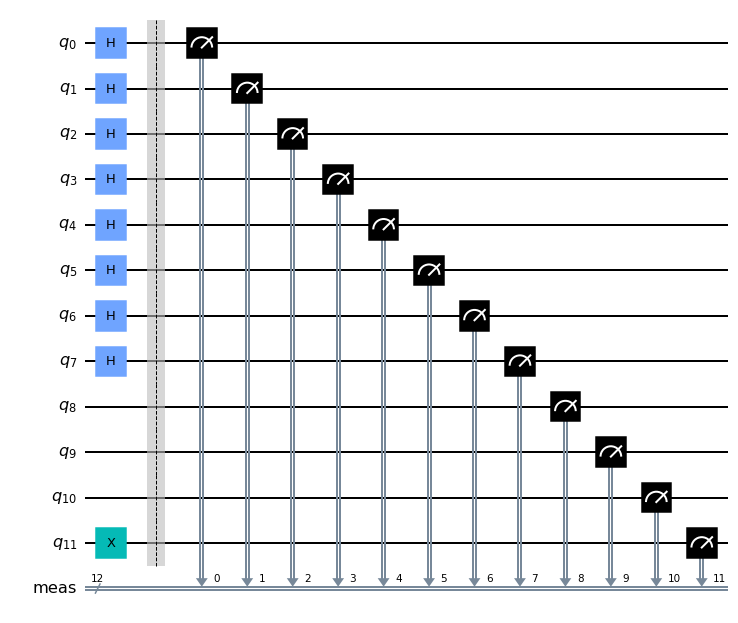

In [34]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc_ti = QuantumCircuit(n_count + 4)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc_ti.h(q)
    
# And auxiliary register in state |1>
qc_ti.x(3+n_count)
'''
# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

'''
# Measure circuit
#qc.measure(range(n_count), range(n_count))
qc_ti.measure_all()
qc_ti.draw("mpl")  # -1 means 'do not fold'  fold=-1,)

In [35]:
# Defining backend 
from qiskit import IBMQ
IBMQ.load_account()
IBMQ.providers() 
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
cloud_backend = provider.get_backend('ibmq_qasm_simulator')

ibmqfactory.load_account:WARNING:2022-07-24 15:28:05,361: Credentials are already in use. The existing account in the session will be replaced.


In [36]:
from qiskit import assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit import execute
# shots = 1000

# real_device = True

job_sim = execute(qc_ti,cloud_backend)
result_sim = job_sim.result()
counts_ti = result_sim.get_counts()
# from qiskit import BasicAer
# backend = BasicAer.get_backend('ibmq_qasm_simulator')

# qasm_sim = QasmSimulator.from_backend(backend)
# We need to transpile for Santiago
# tqc = transpile(shor_circuit, santiago, optimization_level=3)

# if not real_device:
#     tqc = assemble(tqc)

# # Run the circuit and print the counts
# counts = lima.run(qc).result().get_counts()
# plot_histogram(counts)

In [37]:
counts_ti

{'100000000000': 11,
 '100000000001': 17,
 '100000000010': 14,
 '100000000011': 16,
 '100000000100': 14,
 '100000000101': 20,
 '100000000110': 12,
 '100000000111': 18,
 '100000001000': 19,
 '100000001001': 15,
 '100000001010': 19,
 '100000001011': 19,
 '100000001100': 20,
 '100000001101': 18,
 '100000001110': 18,
 '100000001111': 22,
 '100000010000': 12,
 '100000010001': 14,
 '100000010010': 14,
 '100000010011': 15,
 '100000010100': 17,
 '100000010101': 12,
 '100000010110': 17,
 '100000010111': 21,
 '100000011000': 22,
 '100000011001': 14,
 '100000011010': 14,
 '100000011011': 10,
 '100000011100': 14,
 '100000011101': 14,
 '100000011110': 21,
 '100000011111': 16,
 '100000100000': 19,
 '100000100001': 14,
 '100000100010': 15,
 '100000100011': 19,
 '100000100100': 17,
 '100000100101': 22,
 '100000100110': 17,
 '100000100111': 19,
 '100000101000': 23,
 '100000101001': 11,
 '100000101010': 14,
 '100000101011': 14,
 '100000101100': 18,
 '100000101101': 14,
 '100000101110': 16,
 '10000010111

In [51]:
max(counts_ti, key=counts_ti.get)

'100010000101'

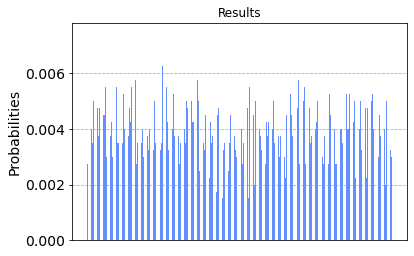

In [38]:
import matplotlib.pyplot as plt

# Create Figure and Axes instances
fig,ax = plt.subplots(1)

# Turn off tick labels
ax.axes.xaxis.set_visible(False)
plot_histogram(counts_ti,bar_labels=False,ax = ax,title='Results')

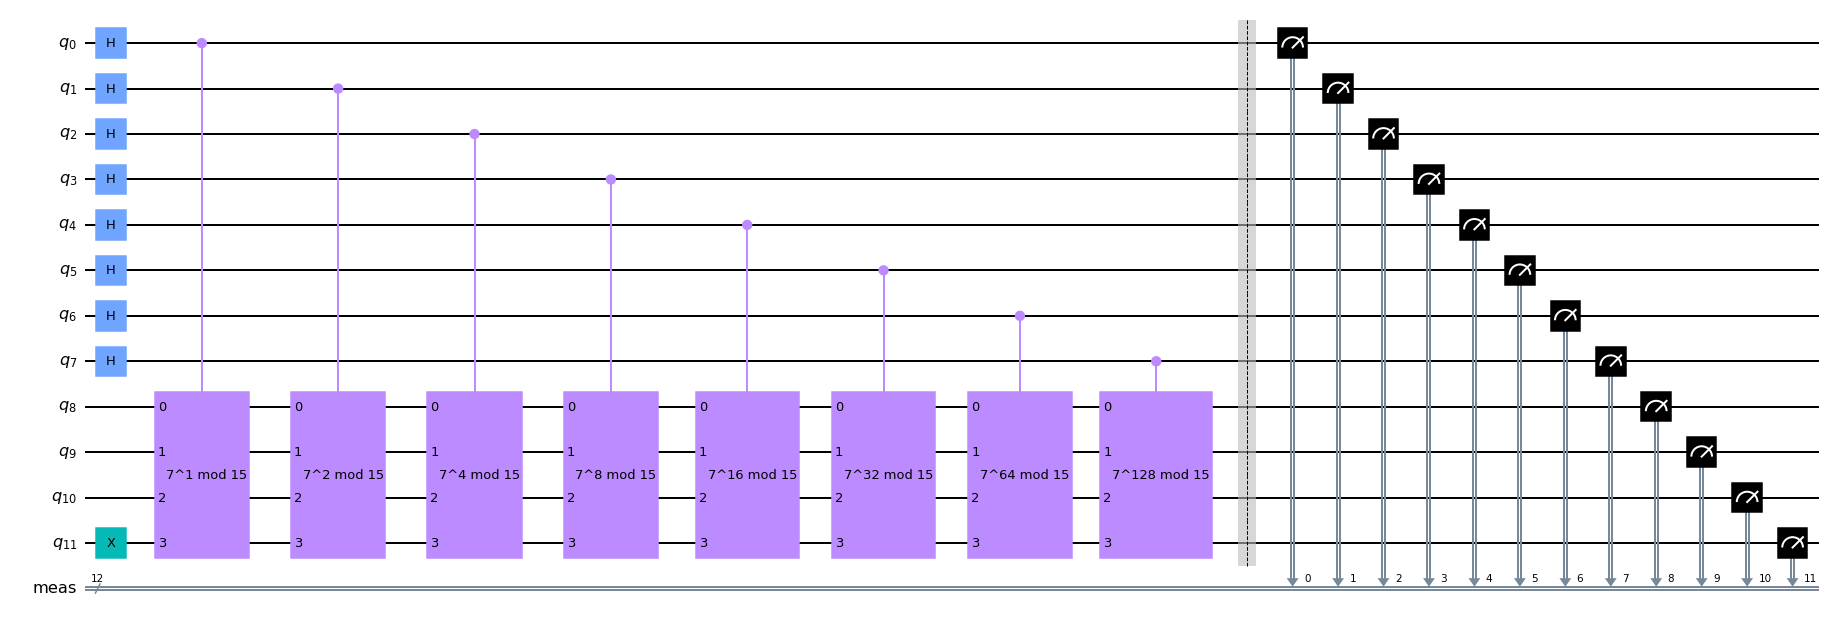

In [39]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc_ta = QuantumCircuit(n_count + 4)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc_ta.h(q)
    
# And auxiliary register in state |1>
qc_ta.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc_ta.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])
'''
# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

'''
# Measure circuit
#qc.measure(range(n_count), range(n_count))
qc_ta.measure_all()
qc_ta.draw("mpl",fold = -1) 

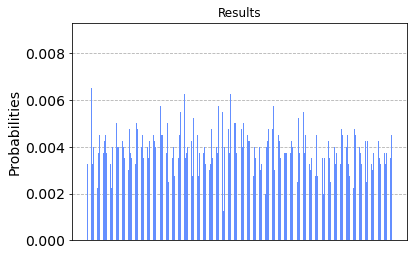

In [40]:
job_sim = execute(qc_ta,cloud_backend)
result_sim = job_sim.result()
counts_ta = result_sim.get_counts()

# Create Figure and Axes instances
fig,ax = plt.subplots(1)

# Turn off tick labels
ax.axes.xaxis.set_visible(False)
plot_histogram(counts_ta,bar_labels=False,ax = ax,title='Results')

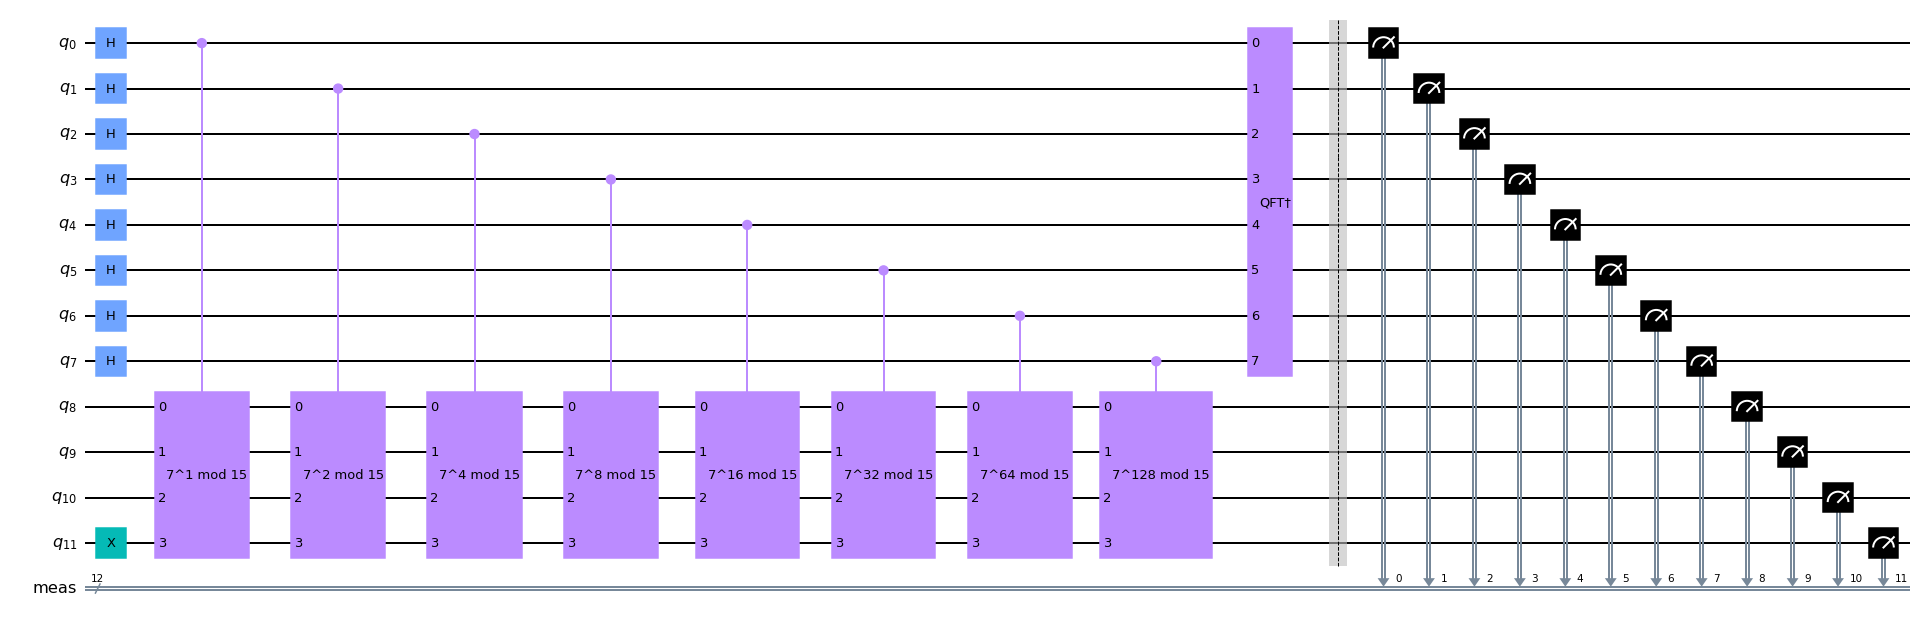

In [41]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc_tq = QuantumCircuit(n_count + 4)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc_tq.h(q)
    
# And auxiliary register in state |1>
qc_tq.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc_tq.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# Do inverse-QFT
qc_tq.append(qft_dagger(n_count), range(n_count))

# Measure circuit
#qc.measure(range(n_count), range(n_count))
qc_tq.measure_all()
qc_tq.draw("mpl",fold = -1) 

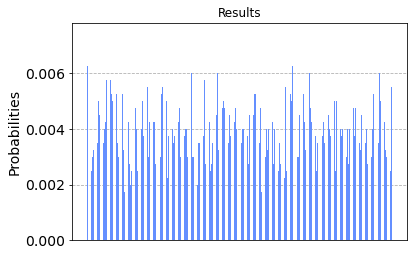

In [45]:
job_sim = execute(qc_ta,cloud_backend)
result_sim = job_sim.result()
counts_tq = result_sim.get_counts()

# Create Figure and Axes instances
fig,ax = plt.subplots(1)

# Turn off tick labels
ax.axes.xaxis.set_visible(False)
plot_histogram(counts_tq,bar_labels=False,ax = ax,title='Results')

In [46]:
# counts_tq

## Time measurement for the model with noise

In [52]:
def qpe_amod15(a, backend):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
    qc.measure(range(n_count), range(n_count))
     
#     t_qc = transpile(qc, backend)
#     result = aer_sim.run(t_qc, shots=1, memory=True).result()
#     readings = result.get_memory()
    
    
    job_sim = execute(qc,backend)
    result_sim = job_sim.result()
    counts = result_sim.get_counts()
    output = max(counts, key=counts.get)

    print("Best option " + output)
    phase = int(output,2)/(2**n_count)
    print("Corresponding Phase: %f" % phase)
    return phase

In [53]:
phase = qpe_amod15(a,cloud_backend) # Phase = s/r
Fraction(phase).limit_denominator(15) # Denominator should (hopefully!) tell us r

Best option 11000000
Corresponding Phase: 0.750000


Fraction(3, 4)

In [56]:
def get_results(a,N,backend):
    factor_found = False
    attempt = 0
    while not factor_found:
        attempt += 1
        print("\nAttempt %i:" % attempt)
        phase = qpe_amod15(a,backend) # Phase = s/r
        frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
        r = frac.denominator
        print("Result: r = %i" % r)
        if phase != 0:
            # Guesses for factors are gcd(x^{r/2} ±1 , 15)
            guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
            print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
            for guess in guesses:
                if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                    print("*** Non-trivial factor found: %i ***" % guess)
                    factor_found = True
    pass

In [59]:
import time
start = time.time()
get_results(7,15,cloud_backend)
end = time.time()
print("Time for succefull factorization is  ",end - start," sec")


Attempt 1:
Best option 11000000
Corresponding Phase: 0.750000
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
*** Non-trivial factor found: 5 ***
Time for succefull factorization is   66.77093458175659  sec


## Density matrix attempts

In [ ]:
psi_AB = qi.Statevector.from_instruction(qc)
psi_AB.draw('latex',prefix='|\\psi_{AB}\\rangle = ')

In [ ]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

In [ ]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')